# Bike Demand - Model using RFE

### Importing and Understanding the Data

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Importing csv

bike = pd.read_csv("E:\\Linear Reg - Assignment\\bike_rental.csv")

In [4]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data Preparation

Handling the categorical variables

In [8]:
bike['season']=bike['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Autumn'})
bike['season'] = bike['season'].astype('category')

In [9]:
bike['weathersit'] = bike['weathersit'].map({1:"Clear", 2:"Mist", 3:"LightRain/LightSnow", 4:"HeavyRain/HeavySnow"})
bike['weathersit'] = bike['weathersit'].astype('category')

In [10]:
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['mnth'] = bike['mnth'].astype('category')

In [11]:
bike['weekday']=bike['weekday'].map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'})
bike['weekday'] = bike['weekday'].astype('category')

In [12]:
bike['yr'] = bike['yr'].map({0:"2018", 1:"2019"})
bike['yr'] = bike['yr'].astype('category')

In [13]:
bike.head()

instant      dteday  season    yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  Winter  2018  Jan        0     Mon           1   
1        2  02-01-2018  Winter  2018  Jan        0     Tue           1   
2        3  03-01-2018  Winter  2018  Jan        0     Wed           1   
3        4  04-01-2018  Winter  2018  Jan        0    Thur           1   
4        5  05-01-2018  Winter  2018  Jan        0     Fri           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [14]:
#columns to drop

cols_to_drop = ['instant','dteday','casual','registered']
bike.drop(cols_to_drop, axis=1, inplace=True)

### Data Visualisation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

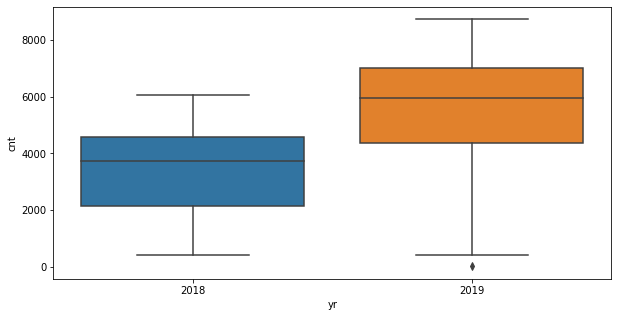

In [16]:
# Boxplot for yr vs cnt

plt.figure(figsize=(10,5))
sns.boxplot(data=bike,x='yr',y='cnt')
plt.show()

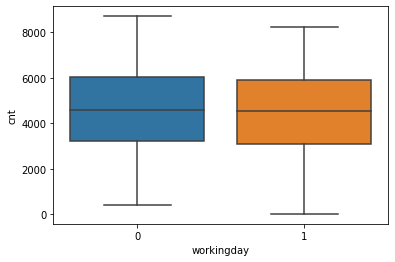

In [17]:
# Boxplot for workigday vs cnt

sns.boxplot(data=bike,x='workingday',y='cnt')
plt.show()


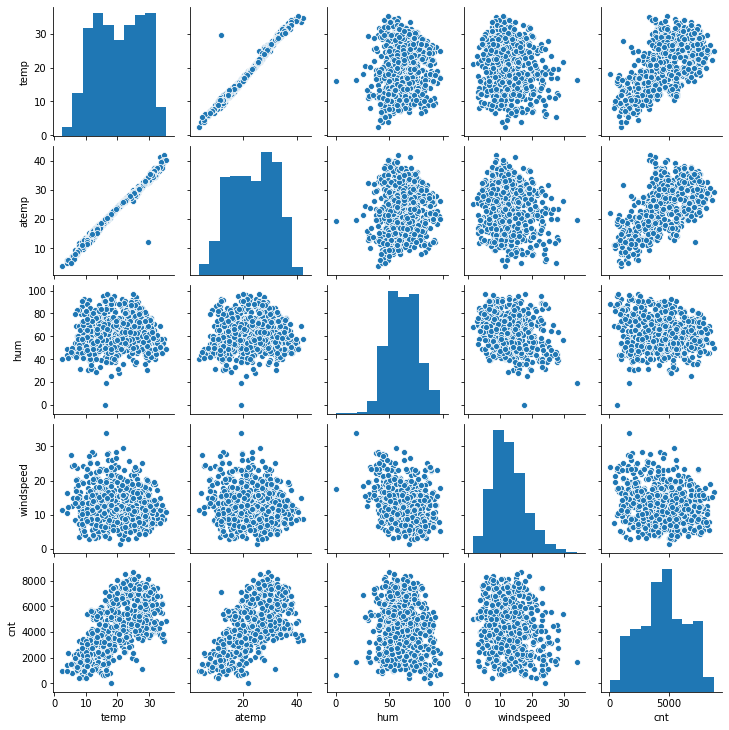

In [18]:
# Pairplot for few numerical variables

sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']], size=2)
plt.show()

In [112]:
bike.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  Spring  \
0        0           1  14.110847  18.18125  80.5833  10.749882   985       0   
1        0           1  14.902598  17.68695  69.6087  16.652113   801       0   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       0   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       0   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       0   

   Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Mon  \
0       0       1    0    0    0    1    0    0    0    0    0    0    0    1   
1       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
2       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
3       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
4       0       1    0    0    0    1    0    0    0    0    0    0    0    0   

   Sat  Sun  Thur  Tue  Wed  LightRain/LightSnow  Mist  2019  
0    0    0     0    0    0                    0     1     0  
1    0    0     0    1    0                    0     1     0  
2    0    0     0    0    1                    0     0     0  
3    0    0     1    0    0                    0     0     0  
4    0    0     0    0    0                    0     0     0

In [20]:
for cols in ['season','mnth','weekday','weathersit']:
    print(bike[cols].value_counts())

Summer    188
Spring    184
Winter    180
Autumn    178
Name: season, dtype: int64
Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64
Tue     105
Mon     105
Wed     104
Thur    104
Sun     104
Sat     104
Fri     104
Name: weekday, dtype: int64
Clear                  463
Mist                   246
LightRain/LightSnow     21
Name: weathersit, dtype: int64


### Dummy Variables


In [21]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'

status = pd.get_dummies(bike['season'])

# Check what the dataset 'status' looks like
status

Autumn  Spring  Summer  Winter
0         0       0       0       1
1         0       0       0       1
2         0       0       0       1
3         0       0       0       1
4         0       0       0       1
5         0       0       0       1
6         0       0       0       1
7         0       0       0       1
8         0       0       0       1
9         0       0       0       1
10        0       0       0       1
11        0       0       0       1
12        0       0       0       1
13        0       0       0       1
14        0       0       0       1
15        0       0       0       1
16        0       0       0       1
17        0       0       0       1
18        0       0       0       1
19        0       0       0       1
20        0       0       0       1
21        0       0       0       1
22        0       0       0       1
23        0       0       0       1
24        0       0       0       1
25        0       0       0       1
26        0       0       0       1
27        0       0       0       1
28        0       0       0       1
29        0       0       0       1
30        0       0       0       1
31        0       0       0       1
32        0       0       0       1
33        0       0       0       1
34        0       0       0       1
35        0       0       0       1
36        0       0       0       1
37        0       0       0       1
38        0       0       0       1
39        0       0       0       1
40        0       0       0       1
41        0       0       0       1
42        0       0       0       1
43        0       0       0       1
44        0       0       0       1
45        0       0       0       1
46        0       0       0       1
47        0       0       0       1
48        0       0       0       1
49        0       0       0       1
50        0       0       0       1
51        0       0       0       1
52        0       0       0       1
53        0       0       0       1
54        0       0       0       1
55        0       0       0       1
56        0       0       0       1
57        0       0       0       1
58        0       0       0       1
59        0       0       0       1
60        0       0       0       1
61        0       0       0       1
62        0       0       0       1
63        0       0       0       1
64        0       0       0       1
65        0       0       0       1
66        0       0       0       1
67        0       0       0       1
68        0       0       0       1
69        0       0       0       1
70        0       0       0       1
71        0       0       0       1
72        0       0       0       1
73        0       0       0       1
74        0       0       0       1
75        0       0       0       1
76        0       0       0       1
77        0       0       0       1
78        0       0       0       1
79        0       1       0       0
80        0       1       0       0
81        0       1       0       0
82        0       1       0       0
83        0       1       0       0
84        0       1       0       0
85        0       1       0       0
86        0       1       0       0
87        0       1       0       0
88        0       1       0       0
89        0       1       0       0
90        0       1       0       0
91        0       1       0       0
92        0       1       0       0
93        0       1       0       0
94        0       1       0       0
95        0       1       0       0
96        0       1       0       0
97        0       1       0       0
98        0       1       0       0
99        0       1       0       0
100       0       1       0       0
101       0       1       0       0
102       0       1       0       0
103       0       1       0       0
104       0       1       0       0
105       0       1       0       0
106       0       1       0       0
107       0       1       0       0
108       0       1       0       0
109       0       1       0       0
110      

In [22]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(bike['season'], drop_first = True)

# Add the results to the original housing dataframe
bike = pd.concat([bike, status], axis = 1)

# Now let's see the head of our dataframe.
bike

season    yr mnth  holiday weekday  workingday           weathersit  \
0    Winter  2018  Jan        0     Mon           1                 Mist   
1    Winter  2018  Jan        0     Tue           1                 Mist   
2    Winter  2018  Jan        0     Wed           1                Clear   
3    Winter  2018  Jan        0    Thur           1                Clear   
4    Winter  2018  Jan        0     Fri           1                Clear   
5    Winter  2018  Jan        0     Sat           0                Clear   
6    Winter  2018  Jan        0     Sun           0                 Mist   
7    Winter  2018  Jan        0     Mon           1                 Mist   
8    Winter  2018  Jan        0     Tue           1                Clear   
9    Winter  2018  Jan        0     Wed           1                Clear   
10   Winter  2018  Jan        0    Thur           1                 Mist   
11   Winter  2018  Jan        0     Fri           1                Clear   
12   Winter  2018  Jan        0     Sat           0                Clear   
13   Winter  2018  Jan        0     Sun           0                Clear   
14   Winter  2018  Jan        0     Mon           1                 Mist   
15   Winter  2018  Jan        0     Tue           1                Clear   
16   Winter  2018  Jan        1     Wed           0                 Mist   
17   Winter  2018  Jan        0    Thur           1                 Mist   
18   Winter  2018  Jan        0     Fri           1                 Mist   
19   Winter  2018  Jan        0     Sat           0                 Mist   
20   Winter  2018  Jan        0     Sun           0                Clear   
21   Winter  2018  Jan        0     Mon           1                Clear   
22   Winter  2018  Jan        0     Tue           1                Clear   
23   Winter  2018  Jan        0     Wed           1                Clear   
24   Winter  2018  Jan        0    Thur           1                 Mist   
25   Winter  2018  Jan        0     Fri           1  LightRain/LightSnow   
26   Winter  2018  Jan        0     Sat           0                Clear   
27   Winter  2018  Jan        0     Sun           0                 Mist   
28   Winter  2018  Jan        0     Mon           1                Clear   
29   Winter  2018  Jan        0     Tue           1                Clear   
30   Winter  2018  Jan        0     Wed           1                 Mist   
31   Winter  2018  Feb        0    Thur           1                 Mist   
32   Winter  2018  Feb        0     Fri           1                 Mist   
33   Winter  2018  Feb        0     Sat           0                Clear   
34   Winter  2018  Feb        0     Sun           0                 Mist   
35   Winter  2018  Feb        0     Mon           1                 Mist   
36   Winter  2018  Feb        0     Tue           1                Clear   
37   Winter  2018  Feb        0     Wed           1                Clear   
38   Winter  2018  Feb        0    Thur           1                Clear   
39   Winter  2018  Feb        0     Fri           1                 Mist   
40   Winter  2018  Feb        0     Sat           0                Clear   
41   Winter  2018  Feb        0     Sun           0                Clear   
42   Winter  2018  Feb        0     Mon           1                Clear   
43   Winter  2018  Feb        0     Tue           1                Clear   
44   Winter  2018  Feb        0     Wed           1                Clear   
45   Winter  2018  Feb        0    Thur           1                Clear   
46   Winter  2018  Feb        0     Fri           1                Clear   
47   Winter  2018  Feb        0     Sat           0                Clear   
48   Winter  2018  Feb        0     Sun           0                Clear   
49   Winter  2018  Feb        0     Mon           1                Clear   
50   Winter  2018  Feb        0     Tue           1                Clear   
51   Winter  2018  Feb        1     Wed           0  

In [23]:
# Drop 'season' as we have created the dummies for it
bike.drop(['season'], axis = 1, inplace = True)

bike.head()

yr mnth  holiday weekday  workingday weathersit       temp     atemp  \
0  2018  Jan        0     Mon           1       Mist  14.110847  18.18125   
1  2018  Jan        0     Tue           1       Mist  14.902598  17.68695   
2  2018  Jan        0     Wed           1      Clear   8.050924   9.47025   
3  2018  Jan        0    Thur           1      Clear   8.200000  10.60610   
4  2018  Jan        0     Fri           1      Clear   9.305237  11.46350   

       hum  windspeed   cnt  Spring  Summer  Winter  
0  80.5833  10.749882   985       0       0       1  
1  69.6087  16.652113   801       0       0       1  
2  43.7273  16.636703  1349       0       0       1  
3  59.0435  10.739832  1562       0       0       1  
4  43.6957  12.522300  1600       0       0       1

In [24]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status1'

status1 = pd.get_dummies(bike['mnth'])

# Check what the dataset 'status' looks like
status1.head()

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    1    0    0    0    0    0    0    0

In [25]:
# Let's drop the first column from status df using 'drop_first = True'
status1 = pd.get_dummies(bike['mnth'], drop_first = True)

# Add the results to the original housing dataframe
bike = pd.concat([bike, status1], axis = 1)

# Now let's see the head of our dataframe.
bike

yr mnth  holiday weekday  workingday           weathersit       temp  \
0    2018  Jan        0     Mon           1                 Mist  14.110847   
1    2018  Jan        0     Tue           1                 Mist  14.902598   
2    2018  Jan        0     Wed           1                Clear   8.050924   
3    2018  Jan        0    Thur           1                Clear   8.200000   
4    2018  Jan        0     Fri           1                Clear   9.305237   
5    2018  Jan        0     Sat           0                Clear   8.378268   
6    2018  Jan        0     Sun           0                 Mist   8.057402   
7    2018  Jan        0     Mon           1                 Mist   6.765000   
8    2018  Jan        0     Tue           1                Clear   5.671653   
9    2018  Jan        0     Wed           1                Clear   6.184153   
10   2018  Jan        0    Thur           1                 Mist   6.932731   
11   2018  Jan        0     Fri           1                Clear   7.081807   
12   2018  Jan        0     Sat           0                Clear   6.765000   
13   2018  Jan        0     Sun           0                Clear   6.595670   
14   2018  Jan        0     Mon           1                 Mist   9.566653   
15   2018  Jan        0     Tue           1                Clear   9.498347   
16   2018  Jan        1     Wed           0                 Mist   7.209153   
17   2018  Jan        0    Thur           1                 Mist   8.883347   
18   2018  Jan        0     Fri           1                 Mist  11.979134   
19   2018  Jan        0     Sat           0                 Mist  10.728347   
20   2018  Jan        0     Sun           0                Clear   7.277500   
21   2018  Jan        0     Mon           1                Clear   2.424346   
22   2018  Jan        0     Tue           1                Clear   3.957390   
23   2018  Jan        0     Wed           1                Clear   3.993043   
24   2018  Jan        0    Thur           1                 Mist   9.162598   
25   2018  Jan        0     Fri           1  LightRain/LightSnow   8.917500   
26   2018  Jan        0     Sat           0                Clear   7.995000   
27   2018  Jan        0     Sun           0                 Mist   8.342598   
28   2018  Jan        0     Mon           1                Clear   8.057402   
29   2018  Jan        0     Tue           1                Clear   8.877402   
30   2018  Jan        0     Wed           1                 Mist   7.414153   
31   2018  Feb        0    Thur           1                 Mist   7.879134   
32   2018  Feb        0     Fri           1                 Mist  10.660000   
33   2018  Feb        0     Sat           0                Clear   7.665237   
34   2018  Feb        0     Sun           0                 Mist   8.663464   
35   2018  Feb        0     Mon           1                 Mist   9.566653   
36   2018  Feb        0     Tue           1                Clear  11.719153   
37   2018  Feb        0     Wed           1                Clear  11.138347   
38   2018  Feb        0    Thur           1                Clear   9.054153   
39   2018  Feb        0     Fri           1                 Mist   5.526103   
40   2018  Feb        0     Sat           0                Clear   5.918268   
41   2018  Feb        0     Sun           0                Clear   7.752731   
42   2018  Feb        0     Mon           1                Clear   9.122500   
43   2018  Feb        0     Tue           1                Clear  12.977402   
44   2018  Feb        0     Wed           1                Clear  17.015000   
45   2018  Feb        0    Thur           1                Clear  10.909567   
46   2018  Feb        0     Fri           1                Clear  13.048701   
47   2018  Feb        0     Sat           0                Clear  17.869153   
48   2018  Feb        0     Sun           0                Clear  21.388347   
49   2018  Feb        0     Mon           1              

In [26]:
# Drop 'mnth' as we have created the dummies for it
bike.drop(['mnth'], axis = 1, inplace = True)

bike.head()

yr  holiday weekday  workingday weathersit       temp     atemp      hum  \
0  2018        0     Mon           1       Mist  14.110847  18.18125  80.5833   
1  2018        0     Tue           1       Mist  14.902598  17.68695  69.6087   
2  2018        0     Wed           1      Clear   8.050924   9.47025  43.7273   
3  2018        0    Thur           1      Clear   8.200000  10.60610  59.0435   
4  2018        0     Fri           1      Clear   9.305237  11.46350  43.6957   

   windspeed   cnt  Spring  Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  \
0  10.749882   985       0       0       1    0    0    0    1    0    0    0   
1  16.652113   801       0       0       1    0    0    0    1    0    0    0   
2  16.636703  1349       0       0       1    0    0    0    1    0    0    0   
3  10.739832  1562       0       0       1    0    0    0    1    0    0    0   
4  12.522300  1600       0       0       1    0    0    0    1    0    0    0   

   May  Nov  Oct  Sep  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [27]:
#Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status2'

status2 = pd.get_dummies(bike['weekday'])

# Check what the dataset 'status' looks like
status2

Fri  Mon  Sat  Sun  Thur  Tue  Wed
0      0    1    0    0     0    0    0
1      0    0    0    0     0    1    0
2      0    0    0    0     0    0    1
3      0    0    0    0     1    0    0
4      1    0    0    0     0    0    0
5      0    0    1    0     0    0    0
6      0    0    0    1     0    0    0
7      0    1    0    0     0    0    0
8      0    0    0    0     0    1    0
9      0    0    0    0     0    0    1
10     0    0    0    0     1    0    0
11     1    0    0    0     0    0    0
12     0    0    1    0     0    0    0
13     0    0    0    1     0    0    0
14     0    1    0    0     0    0    0
15     0    0    0    0     0    1    0
16     0    0    0    0     0    0    1
17     0    0    0    0     1    0    0
18     1    0    0    0     0    0    0
19     0    0    1    0     0    0    0
20     0    0    0    1     0    0    0
21     0    1    0    0     0    0    0
22     0    0    0    0     0    1    0
23     0    0    0    0     0    0    1
24     0    0    0    0     1    0    0
25     1    0    0    0     0    0    0
26     0    0    1    0     0    0    0
27     0    0    0    1     0    0    0
28     0    1    0    0     0    0    0
29     0    0    0    0     0    1    0
30     0    0    0    0     0    0    1
31     0    0    0    0     1    0    0
32     1    0    0    0     0    0    0
33     0    0    1    0     0    0    0
34     0    0    0    1     0    0    0
35     0    1    0    0     0    0    0
36     0    0    0    0     0    1    0
37     0    0    0    0     0    0    1
38     0    0    0    0     1    0    0
39     1    0    0    0     0    0    0
40     0    0    1    0     0    0    0
41     0    0    0    1     0    0    0
42     0    1    0    0     0    0    0
43     0    0    0    0     0    1    0
44     0    0    0    0     0    0    1
45     0    0    0    0     1    0    0
46     1    0    0    0     0    0    0
47     0    0    1    0     0    0    0
48     0    0    0    1     0    0    0
49     0    1    0    0     0    0    0
50     0    0    0    0     0    1    0
51     0    0    0    0     0    0    1
52     0    0    0    0     1    0    0
53     1    0    0    0     0    0    0
54     0    0    1    0     0    0    0
55     0    0    0    1     0    0    0
56     0    1    0    0     0    0    0
57     0    0    0    0     0    1    0
58     0    0    0    0     0    0    1
59     0    0    0    0     1    0    0
60     1    0    0    0     0    0    0
61     0    0    1    0     0    0    0
62     0    0    0    1     0    0    0
63     0    1    0    0     0    0    0
64     0    0    0    0     0    1    0
65     0    0    0    0     0    0    1
66     0    0    0    0     1    0    0
67     1    0    0    0     0    0    0
68     0    0    1    0     0    0    0
69     0    0    0    1     0    0    0
70     0    1    0    0     0    0    0
71     0    0    0    0     0    1    0
72     0    0    0    0     0    0    1
73     0    0    0    0     1    0    0
74     1    0    0    0     0    0    0
75     0    0    1    0     0    0    0
76     0    0    0    1     0    0    0
77     0    1    0    0     0    0    0
78     0    0    0    0     0    1    0
79     0    0    0    0     0    0    1
80     0    0    0    0     1    0    0
81     1    0    0    0     0    0    0
82     0    0    1    0     0    0    0
83     0    0    0    1     0    0    0
84     0    1    0    0     0    0    0
85     0    0    0    0     0    1    0
86     0    0    0    0     0    0    1
87     0    0    0    0     1    0    0
88     1    0    0    0     0    0    0
89     0    0    1    0     0    0    0
90     0    0    0    1     0    0    0
91     0    1    0    0     0    0    0
92     0    0    0    0     0    1    0
93     0    0    0    0     0    0    1
94     0    0    0    0     1    0    0
95     1    0    0    0     0    0    0
96     0    0    1    0     0    0    0
97     0    0    0    1     0    0    0
98     0    1    0    0     0    0    0
99   

In [28]:
# Let's drop the first column from status df using 'drop_first = True'
status2 = pd.get_dummies(bike['weekday'], drop_first = True)

# Add the results to the original housing dataframe
bike = pd.concat([bike, status2], axis = 1)

# Now let's see the head of our dataframe.
bike

yr  holiday weekday  workingday           weathersit       temp  \
0    2018        0     Mon           1                 Mist  14.110847   
1    2018        0     Tue           1                 Mist  14.902598   
2    2018        0     Wed           1                Clear   8.050924   
3    2018        0    Thur           1                Clear   8.200000   
4    2018        0     Fri           1                Clear   9.305237   
5    2018        0     Sat           0                Clear   8.378268   
6    2018        0     Sun           0                 Mist   8.057402   
7    2018        0     Mon           1                 Mist   6.765000   
8    2018        0     Tue           1                Clear   5.671653   
9    2018        0     Wed           1                Clear   6.184153   
10   2018        0    Thur           1                 Mist   6.932731   
11   2018        0     Fri           1                Clear   7.081807   
12   2018        0     Sat           0                Clear   6.765000   
13   2018        0     Sun           0                Clear   6.595670   
14   2018        0     Mon           1                 Mist   9.566653   
15   2018        0     Tue           1                Clear   9.498347   
16   2018        1     Wed           0                 Mist   7.209153   
17   2018        0    Thur           1                 Mist   8.883347   
18   2018        0     Fri           1                 Mist  11.979134   
19   2018        0     Sat           0                 Mist  10.728347   
20   2018        0     Sun           0                Clear   7.277500   
21   2018        0     Mon           1                Clear   2.424346   
22   2018        0     Tue           1                Clear   3.957390   
23   2018        0     Wed           1                Clear   3.993043   
24   2018        0    Thur           1                 Mist   9.162598   
25   2018        0     Fri           1  LightRain/LightSnow   8.917500   
26   2018        0     Sat           0                Clear   7.995000   
27   2018        0     Sun           0                 Mist   8.342598   
28   2018        0     Mon           1                Clear   8.057402   
29   2018        0     Tue           1                Clear   8.877402   
30   2018        0     Wed           1                 Mist   7.414153   
31   2018        0    Thur           1                 Mist   7.879134   
32   2018        0     Fri           1                 Mist  10.660000   
33   2018        0     Sat           0                Clear   7.665237   
34   2018        0     Sun           0                 Mist   8.663464   
35   2018        0     Mon           1                 Mist   9.566653   
36   2018        0     Tue           1                Clear  11.719153   
37   2018        0     Wed           1                Clear  11.138347   
38   2018        0    Thur           1                Clear   9.054153   
39   2018        0     Fri           1                 Mist   5.526103   
40   2018        0     Sat           0                Clear   5.918268   
41   2018        0     Sun           0                Clear   7.752731   
42   2018        0     Mon           1                Clear   9.122500   
43   2018        0     Tue           1                Clear  12.977402   
44   2018        0     Wed           1                Clear  17.015000   
45   2018        0    Thur           1                Clear  10.909567   
46   2018        0     Fri           1                Clear  13.048701   
47   2018        0     Sat           0                Clear  17.869153   
48   2018        0     Sun           0                Clear  21.388347   
49   2018        0     Mon           1                Clear  16.365847   
50   2018        0     Tue           1                Clear  11.693897   
51   2018        1     Wed           0                 Mist  12.436653   
52   2018        0    Thur           1                Clear   7.471102   
53   2018  

In [29]:
# Drop 'weekday' as we have created the dummies for it
bike.drop(['weekday'], axis = 1, inplace = True)

bike.head()

yr  holiday  workingday weathersit       temp     atemp      hum  \
0  2018        0           1       Mist  14.110847  18.18125  80.5833   
1  2018        0           1       Mist  14.902598  17.68695  69.6087   
2  2018        0           1      Clear   8.050924   9.47025  43.7273   
3  2018        0           1      Clear   8.200000  10.60610  59.0435   
4  2018        0           1      Clear   9.305237  11.46350  43.6957   

   windspeed   cnt  Spring  Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  \
0  10.749882   985       0       0       1    0    0    0    1    0    0    0   
1  16.652113   801       0       0       1    0    0    0    1    0    0    0   
2  16.636703  1349       0       0       1    0    0    0    1    0    0    0   
3  10.739832  1562       0       0       1    0    0    0    1    0    0    0   
4  12.522300  1600       0       0       1    0    0    0    1    0    0    0   

   May  Nov  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  
0    0    0    0    0    1    0    0     0    0    0  
1    0    0    0    0    0    0    0     0    1    0  
2    0    0    0    0    0    0    0     0    0    1  
3    0    0    0    0    0    0    0     1    0    0  
4    0    0    0    0    0    0    0     0    0    0

In [30]:
#Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status3'

status3 = pd.get_dummies(bike['weathersit'])

# Check what the dataset 'status' looks like
status3


Clear  LightRain/LightSnow  Mist
0        0                    0     1
1        0                    0     1
2        1                    0     0
3        1                    0     0
4        1                    0     0
5        1                    0     0
6        0                    0     1
7        0                    0     1
8        1                    0     0
9        1                    0     0
10       0                    0     1
11       1                    0     0
12       1                    0     0
13       1                    0     0
14       0                    0     1
15       1                    0     0
16       0                    0     1
17       0                    0     1
18       0                    0     1
19       0                    0     1
20       1                    0     0
21       1                    0     0
22       1                    0     0
23       1                    0     0
24       0                    0     1
25       0                    1     0
26       1                    0     0
27       0                    0     1
28       1                    0     0
29       1                    0     0
30       0                    0     1
31       0                    0     1
32       0                    0     1
33       1                    0     0
34       0                    0     1
35       0                    0     1
36       1                    0     0
37       1                    0     0
38       1                    0     0
39       0                    0     1
40       1                    0     0
41       1                    0     0
42       1                    0     0
43       1                    0     0
44       1                    0     0
45       1                    0     0
46       1                    0     0
47       1                    0     0
48       1                    0     0
49       1                    0     0
50       1                    0     0
51       0                    0     1
52       1                    0     0
53       1                    0     0
54       0                    0     1
55       0                    0     1
56       1                    0     0
57       1                    0     0
58       0                    0     1
59       1                    0     0
60       1                    0     0
61       1                    0     0
62       0                    0     1
63       0                    0     1
64       0                    0     1
65       1                    0     0
66       1                    0     0
67       0                    0     1
68       0                    1     0
69       0                    0     1
70       1                    0     0
71       1                    0     0
72       1                    0     0
73       0                    0     1
74       0                    0     1
75       1                    0     0
76       1                    0     0
77       1                    0     0
78       1                    0     0
79       0                    0     1
80       1                    0     0
81       0                    0     1
82       0                    0     1
83       1                    0     0
84       1                    0     0
85       0                    0     1
86       1                    0     0
87       1                    0     0
88       0                    0     1
89       0                    1     0
90       0                    0     1
91       0                    0     1
92       1                    0     0
93       1                    0     0
94       0                    0     1
95       1                    0     0
96       1                    0     0
97       0                    0     1
98       0                    0     1
99       0                    0     1
100      0                    0     1
101      0                    0     1
102      0                    0     1
103      1                    0     0
104      1     

In [31]:
# Let's drop the first column from status df using 'drop_first = True'
status3 = pd.get_dummies(bike['weathersit'], drop_first = True)

# Add the results to the original housing dataframe
bike = pd.concat([bike, status3], axis = 1)

# Now let's see the head of our dataframe.
bike

yr  holiday  workingday           weathersit       temp      atemp  \
0    2018        0           1                 Mist  14.110847  18.181250   
1    2018        0           1                 Mist  14.902598  17.686950   
2    2018        0           1                Clear   8.050924   9.470250   
3    2018        0           1                Clear   8.200000  10.606100   
4    2018        0           1                Clear   9.305237  11.463500   
5    2018        0           0                Clear   8.378268  11.660450   
6    2018        0           0                 Mist   8.057402  10.441950   
7    2018        0           1                 Mist   6.765000   8.112700   
8    2018        0           1                Clear   5.671653   5.808750   
9    2018        0           1                Clear   6.184153   7.544400   
10   2018        0           1                 Mist   6.932731   9.573200   
11   2018        0           1                Clear   7.081807   8.023650   
12   2018        0           0                Clear   6.765000   7.544150   
13   2018        0           0                Clear   6.595670   9.420650   
14   2018        0           1                 Mist   9.566653  12.405600   
15   2018        0           1                Clear   9.498347  11.710850   
16   2018        1           0                 Mist   7.209153   8.838550   
17   2018        0           1                 Mist   8.883347  11.616650   
18   2018        0           1                 Mist  11.979134  14.921100   
19   2018        0           0                 Mist  10.728347  12.752500   
20   2018        0           0                Clear   7.277500   7.891650   
21   2018        0           1                Clear   2.424346   3.953480   
22   2018        0           1                Clear   3.957390   4.941955   
23   2018        0           1                Clear   3.993043   5.896500   
24   2018        0           1                 Mist   9.162598  11.726300   
25   2018        0           1  LightRain/LightSnow   8.917500  10.180000   
26   2018        0           0                Clear   7.995000  10.985000   
27   2018        0           0                 Mist   8.342598  11.165850   
28   2018        0           1                Clear   8.057402  10.606300   
29   2018        0           1                Clear   8.877402  12.516100   
30   2018        0           1                 Mist   7.414153   9.312500   
31   2018        0           1                 Mist   7.879134  11.726500   
32   2018        0           1                 Mist  10.660000  12.720850   
33   2018        0           0                Clear   7.665237   8.893900   
34   2018        0           0                 Mist   8.663464  11.429350   
35   2018        0           1                 Mist   9.566653  12.152900   
36   2018        0           1                Clear  11.719153  14.583550   
37   2018        0           1                Clear  11.138347  15.182900   
38   2018        0           1                Clear   9.054153   9.912300   
39   2018        0           1                 Mist   5.526103   7.214150   
40   2018        0           0                Clear   5.918268   7.477400   
41   2018        0           0                Clear   7.752731  10.675450   
42   2018        0           1                Clear   9.122500  11.647700   
43   2018        0           1                Clear  12.977402  16.205650   
44   2018        0           1                Clear  17.015000  19.917500   
45   2018        0           1                Clear  10.909567  12.713700   
46   2018        0           1                Clear  13.048701  15.810000   
47   2018        0           0                Clear  17.869153  21.432900   
48   2018        0           0                Clear  21.388347  25.599150   
49   2018        0           1                Clear  16.365847  19.570200   
50   2018        0           1                Clear  11.693897  13.866500   
51 

In [32]:
# Drop 'weathersit' as we have created the dummies for it
bike.drop(['weathersit'], axis = 1, inplace = True)

bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0  2018        0           1  14.110847  18.18125  80.5833  10.749882   985   
1  2018        0           1  14.902598  17.68695  69.6087  16.652113   801   
2  2018        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3  2018        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4  2018        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Spring  Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0       0       0       1    0    0    0    1    0    0    0    0    0    0   
1       0       0       1    0    0    0    1    0    0    0    0    0    0   
2       0       0       1    0    0    0    1    0    0    0    0    0    0   
3       0       0       1    0    0    0    1    0    0    0    0    0    0   
4       0       0       1    0    0    0    1    0    0    0    0    0    0   

   Sep  Mon  Sat  Sun  Thur  Tue  Wed  LightRain/LightSnow  Mist  
0    0    1    0    0     0    0    0                    0     1  
1    0    0    0    0     0    1    0                    0     1  
2    0    0    0    0     0    0    1                    0     0  
3    0    0    0    0     1    0    0                    0     0  
4    0    0    0    0     0    0    0                    0     0

In [33]:
#Get the dummy variables for the feature 'yr' and store it in a new variable - 'status4'

status4 = pd.get_dummies(bike['yr'])

# Check what the dataset 'status' looks like
status4

2018  2019
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0
5       1     0
6       1     0
7       1     0
8       1     0
9       1     0
10      1     0
11      1     0
12      1     0
13      1     0
14      1     0
15      1     0
16      1     0
17      1     0
18      1     0
19      1     0
20      1     0
21      1     0
22      1     0
23      1     0
24      1     0
25      1     0
26      1     0
27      1     0
28      1     0
29      1     0
30      1     0
31      1     0
32      1     0
33      1     0
34      1     0
35      1     0
36      1     0
37      1     0
38      1     0
39      1     0
40      1     0
41      1     0
42      1     0
43      1     0
44      1     0
45      1     0
46      1     0
47      1     0
48      1     0
49      1     0
50      1     0
51      1     0
52      1     0
53      1     0
54      1     0
55      1     0
56      1     0
57      1     0
58      1     0
59      1     0
60      1     0
61      1     0
62      1     0
63      1     0
64      1     0
65      1     0
66      1     0
67      1     0
68      1     0
69      1     0
70      1     0
71      1     0
72      1     0
73      1     0
74      1     0
75      1     0
76      1     0
77      1     0
78      1     0
79      1     0
80      1     0
81      1     0
82      1     0
83      1     0
84      1     0
85      1     0
86      1     0
87      1     0
88      1     0
89      1     0
90      1     0
91      1     0
92      1     0
93      1     0
94      1     0
95      1     0
96      1     0
97      1     0
98      1     0
99      1     0
100     1     0
101     1     0
102     1     0
103     1     0
104     1     0
105     1     0
106     1     0
107     1     0
108     1     0
109     1     0
110     1     0
111     1     0
112     1     0
113     1     0
114     1     0
115     1     0
116     1     0
117     1     0
118     1     0
119     1     0
120     1     0
121     1     0
122     1     0
123     1     0
124     1     0
125     1     0
126     1     0
127     1     0
128     1     0
129     1     0
130     1     0
131     1     0
132     1     0
133     1     0
134     1     0
135     1     0
136     1     0
137     1     0
138     1     0
139     1     0
140     1     0
141     1     0
142     1     0
143     1     0
144     1     0
145     1     0
146     1     0
147     1     0
148     1     0
149     1     0
150     1     0
151     1     0
152     1     0
153     1     0
154     1     0
155     1     0
156     1     0
157     1     0
158     1     0
159     1     0
160     1     0
161     1     0
162     1     0
163     1     0
164     1     0
165     1     0
166     1     0
167     1     0
168     1     0
169     1     0
170     1     0
171     1     0
172     1     0
173     1     0
174     1     0
175     1     0
176     1     0
177     1     0
178     1     0
179     1     0
180     1     0
181     1     0
182     1     0
183     1     0
184     1     0
185     1     0
186     1     0
187     1     0
188     1     0
189     1     0
190     1     0
191     1     0
192     1     0
193     1     0
194     1     0
195     1     0
196     1     0
197     1     0
198     1     0
199     1     0
200     1     0
201     1     0
202     1     0
203     1     0
204     1     0
205     1     0
206     1     0
207     1     0
208     1     0
209     1     0
210     1     0
211     1     0
212     1     0
213     1     0
214     1     0
215     1     0
216     1     0
217     1     0
218     1     0
219     1     0
220     1     0
221     1     0
222     1     0
223     1     0
224     1     0
225     1     0
226     1     0
227     1     0
228     1     0
229     1     0
230     1     0
231     1     0
232     1     0
233     1     0
234     1     0
235     1     0
236     1     0
237     1     0
238     1     0
239     1     0
240     1     0
241     1     0
242     1     0
243     1     0
244     1     0
245     1     0
246     1     0
247     1     0
248     1     0
249  

In [34]:
# Let's drop the first column from status df using 'drop_first = True'
status4 = pd.get_dummies(bike['yr'], drop_first = True)

# Add the results to the original housing dataframe
bike = pd.concat([bike, status4], axis = 1)

# Now let's see the head of our dataframe.
bike

yr  holiday  workingday       temp      atemp      hum  windspeed  \
0    2018        0           1  14.110847  18.181250  80.5833  10.749882   
1    2018        0           1  14.902598  17.686950  69.6087  16.652113   
2    2018        0           1   8.050924   9.470250  43.7273  16.636703   
3    2018        0           1   8.200000  10.606100  59.0435  10.739832   
4    2018        0           1   9.305237  11.463500  43.6957  12.522300   
5    2018        0           0   8.378268  11.660450  51.8261   6.000868   
6    2018        0           0   8.057402  10.441950  49.8696  11.304642   
7    2018        0           1   6.765000   8.112700  53.5833  17.875868   
8    2018        0           1   5.671653   5.808750  43.4167  24.250650   
9    2018        0           1   6.184153   7.544400  48.2917  14.958889   
10   2018        0           1   6.932731   9.573200  68.6364   8.182844   
11   2018        0           1   7.081807   8.023650  59.9545  20.410009   
12   2018        0           0   6.765000   7.544150  47.0417  20.167000   
13   2018        0           0   6.595670   9.420650  53.7826   8.478716   
14   2018        0           1   9.566653  12.405600  49.8750  10.583521   
15   2018        0           1   9.498347  11.710850  48.3750  12.625011   
16   2018        1           0   7.209153   8.838550  53.7500  12.999139   
17   2018        0           1   8.883347  11.616650  86.1667   9.833925   
18   2018        0           1  11.979134  14.921100  74.1739  13.957239   
19   2018        0           0  10.728347  12.752500  53.8333  13.125568   
20   2018        0           0   7.277500   7.891650  45.7083  23.667214   
21   2018        0           1   2.424346   3.953480  40.0000  11.521990   
22   2018        0           1   3.957390   4.941955  43.6522  16.522200   
23   2018        0           1   3.993043   5.896500  49.1739  10.608110   
24   2018        0           1   9.162598  11.726300  61.6957   8.696332   
25   2018        0           1   8.917500  10.180000  86.2500  19.687950   
26   2018        0           0   7.995000  10.985000  68.7500   7.627079   
27   2018        0           0   8.342598  11.165850  79.3043   8.261100   
28   2018        0           1   8.057402  10.606300  65.1739   9.739455   
29   2018        0           1   8.877402  12.516100  72.2174   4.956834   
30   2018        0           1   7.414153   9.312500  60.3750  12.541864   
31   2018        0           1   7.879134  11.726500  82.9565   3.565271   
32   2018        0           1  10.660000  12.720850  77.5417  17.708636   
33   2018        0           0   7.665237   8.893900  43.7826  18.609384   
34   2018        0           0   8.663464  11.429350  58.5217   8.565213   
35   2018        0           1   9.566653  12.152900  92.9167  10.792293   
36   2018        0           1  11.719153  14.583550  56.8333   9.500600   
37   2018        0           1  11.138347  15.182900  73.8333   3.042356   
38   2018        0           1   9.054153   9.912300  53.7917  24.250650   
39   2018        0           1   5.526103   7.214150  49.4783  12.652213   
40   2018        0           0   5.918268   7.477400  43.7391  14.869645   
41   2018        0           0   7.752731  10.675450  50.6364   7.272850   
42   2018        0           1   9.122500  11.647700  54.4167  13.625589   
43   2018        0           1  12.977402  16.205650  45.7391  17.479161   
44   2018        0           1  17.015000  19.917500  37.5833  27.999836   
45   2018        0           1  10.909567  12.713700  31.4348  19.522058   
46   2018        0           1  13.048701  15.810000  42.3478  16.869997   
47   2018        0           0  17.869153  21.432900  50.5000  15.416968   
48   2018        0           0  21.388347  25.599150  51.6667  17.749975   
49   2018        0           1  16.365847  19.570200  18.7917  34.000021   
50   2018        0           1  11.693897  13.866500  40.7826  14.956745   
51   2018        1           0  12.436653  14.203750  6

In [35]:
# Drop 'yr' as we have created the dummies for it
bike.drop(['yr'], axis = 1, inplace = True)

bike.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  Spring  \
0        0           1  14.110847  18.18125  80.5833  10.749882   985       0   
1        0           1  14.902598  17.68695  69.6087  16.652113   801       0   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       0   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       0   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       0   

   Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Mon  \
0       0       1    0    0    0    1    0    0    0    0    0    0    0    1   
1       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
2       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
3       0       1    0    0    0    1    0    0    0    0    0    0    0    0   
4       0       1    0    0    0    1    0    0    0    0    0    0    0    0   

   Sat  Sun  Thur  Tue  Wed  LightRain/LightSnow  Mist  2019  
0    0    0     0    0    0                    0     1     0  
1    0    0     0    1    0                    0     1     0  
2    0    0     0    0    1                    0     0     0  
3    0    0     1    0    0                    0     0     0  
4    0    0     0    0    0                    0     0     0

In [36]:
bike.shape

(730, 30)

### Splitting the Data into Train and Test Sets

In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into Train and Test

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
df_train.shape

(510, 30)

### Rescaling the Features

We are using MinMax scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  0.864243   
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           1  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   

     Spring  Summer  Winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
653       0       0       0    0    0    0    0    0    0    0    0    0    1   
576       0       1       0    0    0    0    0    1    0    0    0    0    0   
426       0       0       1    0    0    0    0    0    0    1    0    0    0   
728       0       0       1    0    1    0    0    0    0    0    0    0    0   
482       1       0       0    0    0    0    0    0    0    0    0    0    0   

     Sep  Mon  Sat  Sun  Thur  Tue  Wed  LightRain/LightSnow  Mist  2019  
653    0    0    0    0     0    0    1                    0     0     1  
576    0    0    0    0     0    0    1                    0     0     1  
426    0    0    0    1     0    0    0                    0     1     1  
728    0    1    0    0     0    0    0                    0     0     1  
482    0    0    0    1     0    0    0                    0     1     1

In [42]:
df_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.711765    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.453386    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      Spring      Summer      Winter         Aug         Dec  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.513620    0.245098    0.262745    0.243137    0.096078    0.084314   
std      0.224593    0.430568    0.440557    0.429398    0.294988    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.356420    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.518638    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.684710    0.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Feb         Jan         Jul         Jun         Mar         May  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.066667    0.088235    0.076471    0.074510    0.098039    0.084314   
std      0.249689    0.283915    0.266010    0.262857    0.297660    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Nov         Oct         Sep         Mon         Sat         Sun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.080392    0.154902    0.129412    0.137255   
std      0.281045    0.281045    0.272166    0.362166    0.335985    0.344454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Thur         Tue         Wed  LightRain/LightSnow        Mist  \
count  510.000000  510.000000  510.000000           510.000000  510.000000   
mean     0.143137    0.152941    0.135294             0.029412    0.343137   
std      0.350557    0.360284    0.342373             0.169124    0.475223   
min      0.000000    0.000000    0.000000             0.000000    0.000000   
25%      0.000000    0.000000    0.000000             0.000000    0.000000   
50%      0.000000    0.000000    0.000000             0.000000    0.000000   
75%      0.000000    0.000000    0.000000             0.000000    1.000000   
max      1.000000    1.000000    1.000000             1.000000    1.000000   

             2019  
count  510.000000  
mean     0.507843  
std      0.500429  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

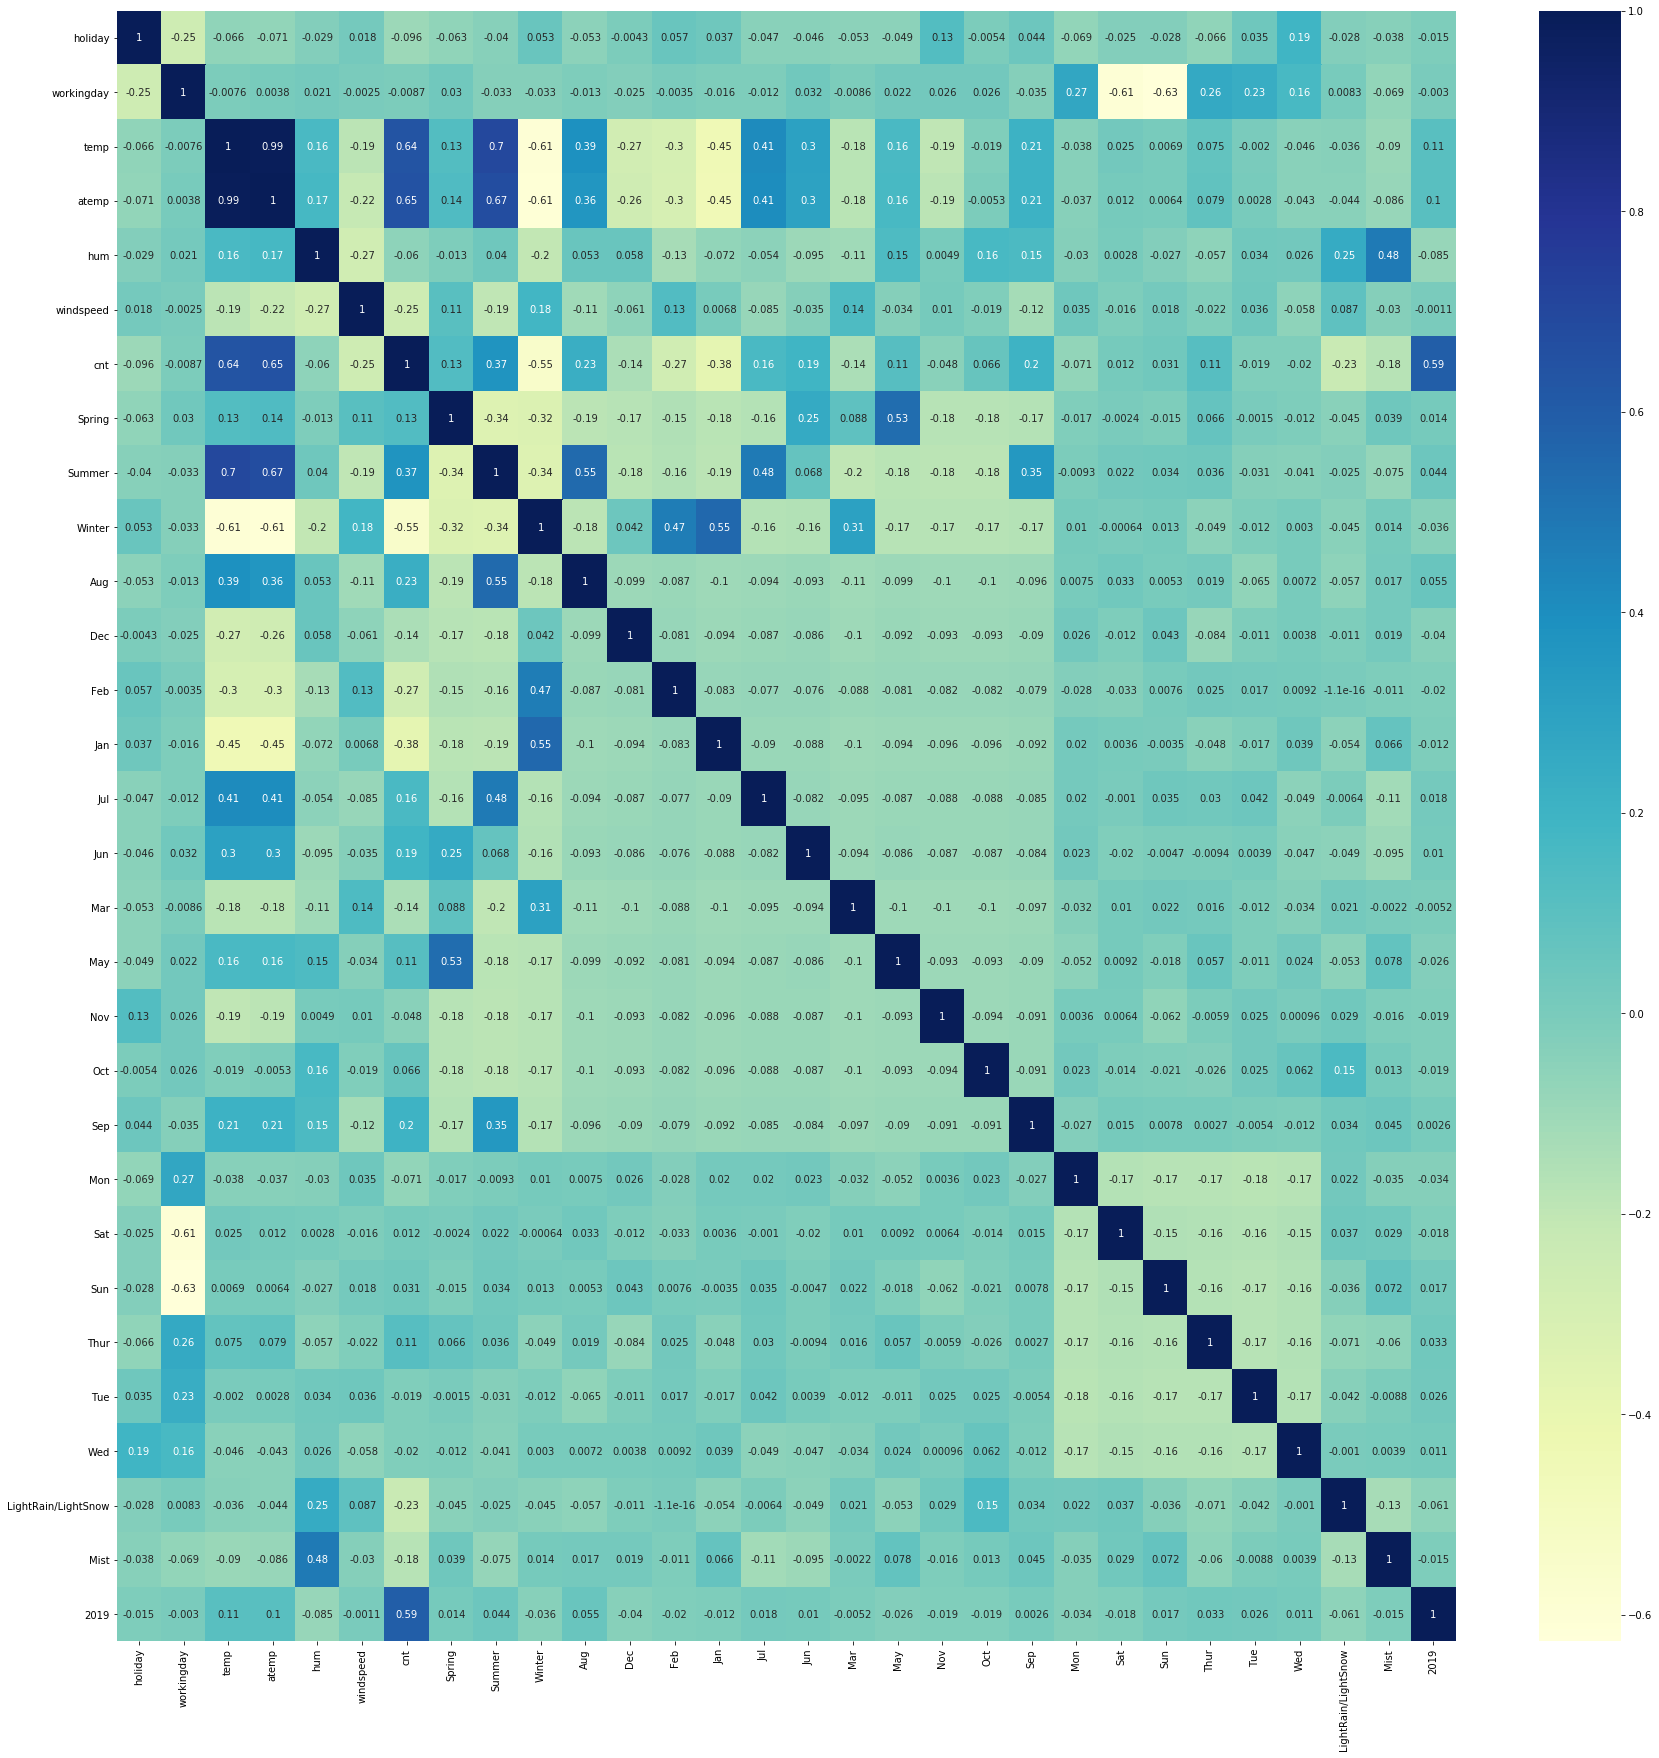

In [43]:
# To check correlation coefficients of df_train

plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              510 non-null    int64  
 1   workingday           510 non-null    int64  
 2   temp                 510 non-null    float64
 3   atemp                510 non-null    float64
 4   hum                  510 non-null    float64
 5   windspeed            510 non-null    float64
 6   Spring               510 non-null    uint8  
 7   Summer               510 non-null    uint8  
 8   Winter               510 non-null    uint8  
 9   Aug                  510 non-null    uint8  
 10  Dec                  510 non-null    uint8  
 11  Feb                  510 non-null    uint8  
 12  Jan                  510 non-null    uint8  
 13  Jul                  510 non-null    uint8  
 14  Jun                  510 non-null    uint8  
 15  Mar                  510 non-null    ui

### Building our model

We will use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE

Recursive feature elimination


In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('LightRain/LightSnow', True, 1),
 ('Mist', True, 1),
 ('2019', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'LightRain/LightSnow', 'Mist',
       '2019'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        17:16:44   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4237    

In [55]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  temp  24.59
2                   hum  23.41
5                Summer   5.36
3             windspeed   4.44
6                Winter   3.12
4                Spring   3.10
13                 Mist   2.24
14                 2019   2.06
8                   Jan   1.78
10                  Nov   1.65
9                   Jul   1.61
7                   Dec   1.46
11                  Sep   1.45
12  LightRain/LightSnow   1.27
0               holiday   1.06

In [58]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Dec', 1)

In [59]:
# Building 2nd model

X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.25e-189
Time:                        17:16:44   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4017    

In [62]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  temp  23.41
2                   hum  19.19
5                Summer   5.29
3             windspeed   4.39
6                Winter   3.02
4                Spring   2.86
12                 Mist   2.18
13                 2019   2.06
7                   Jan   1.70
8                   Jul   1.61
9                   Nov   1.49
10                  Sep   1.43
11  LightRain/LightSnow   1.23
0               holiday   1.06

In [64]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Nov', 1)

In [65]:
# Building 3rd model

X_train_rfe = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.45e-190
Time:                        17:16:44   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3888    

In [67]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  temp  23.34
2                   hum  17.83
5                Summer   5.04
3             windspeed   4.21
6                Winter   2.59
4                Spring   2.48
11                 Mist   2.16
12                 2019   2.05
7                   Jan   1.70
8                   Jul   1.61
9                   Sep   1.41
10  LightRain/LightSnow   1.21
0               holiday   1.04

In [69]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Jan', 1)

In [70]:
# Building 4th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.69e-190
Time:                        17:16:44   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3829    

In [72]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  temp  21.95
2                   hum  17.01
5                Summer   4.90
3             windspeed   4.19
4                Spring   2.44
10                 Mist   2.15
6                Winter   2.05
11                 2019   2.04
7                   Jul   1.61
8                   Sep   1.41
9   LightRain/LightSnow   1.21
0               holiday   1.04

In [74]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Jul', 1)

In [75]:
# Building 5th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.39e-189
Time:                        17:16:44   Log-Likelihood:                 504.47
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     498   BIC:                            -934.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3832    

In [77]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  temp  21.39
2                   hum  16.85
5                Summer   4.60
3             windspeed   4.19
4                Spring   2.42
9                  Mist   2.15
6                Winter   2.05
10                 2019   2.04
7                   Sep   1.29
8   LightRain/LightSnow   1.21
0               holiday   1.04

In [79]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('holiday', 1)

In [80]:
# Building 6th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          7.93e-188
Time:                        17:16:44   Log-Likelihood:                 497.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     499   BIC:                            -926.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3791    

In [82]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 temp  21.39
1                  hum  16.80
4               Summer   4.59
2            windspeed   4.18
3               Spring   2.41
8                 Mist   2.15
5               Winter   2.05
9                 2019   2.04
6                  Sep   1.28
7  LightRain/LightSnow   1.20

In [84]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Mist', 1)

In [85]:
# Building 7th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.35e-184
Time:                        17:16:45   Log-Likelihood:                 485.72
No. Observations:                 510   AIC:                            -951.4
Df Residuals:                     500   BIC:                            -909.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4236    

In [87]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 temp  19.06
1                  hum  11.62
4               Summer   4.50
2            windspeed   4.18
3               Spring   2.39
8                 2019   2.04
5               Winter   2.03
6                  Sep   1.28
7  LightRain/LightSnow   1.11

In [89]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('Summer', 1)

In [90]:
# Building 8th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.95e-175
Time:                        17:16:45   Log-Likelihood:                 462.45
No. Observations:                 510   AIC:                            -906.9
Df Residuals:                     501   BIC:                            -868.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4395    

In [92]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  hum  10.01
0                 temp   8.50
2            windspeed   4.15
7                 2019   2.03
4               Winter   2.01
3               Spring   1.60
5                  Sep   1.22
6  LightRain/LightSnow   1.11

In [94]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('hum', 1)

In [95]:
# Building 9th model

X_train_rfe = sm.add_constant(X_train_rfe)

In [96]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     272.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.39e-166
Time:                        17:16:45   Log-Likelihood:                 438.74
No. Observations:                 510   AIC:                            -861.5
Df Residuals:                     502   BIC:                            -827.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2746    

In [97]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            windspeed  3.98
0                 temp  3.73
6                 2019  2.02
3               Winter  1.64
2               Spring  1.57
4                  Sep  1.20
5  LightRain/LightSnow  1.05

In [99]:
X_train_rfe

temp  windspeed  Spring  Winter  Sep  LightRain/LightSnow  2019
653  0.509887   0.300794       0       0    0                    0     1
576  0.815169   0.264686       0       0    0                    0     1
426  0.442393   0.255342       0       1    0                    0     1
728  0.245101   0.663106       0       1    0                    0     1
482  0.395666   0.188475       1       0    0                    0     1
111  0.345824   0.380981       1       0    0                    0     0
580  0.914852   0.462538       0       0    0                    0     1
500  0.719639   0.172431       1       0    0                    0     1
479  0.520271   0.164434       1       0    0                    0     1
472  0.503656   0.270032       1       0    0                    0     1
455  0.456929   0.279394       1       0    0                    0     1
636  0.602302   0.398358       0       0    1                    0     1
224  0.780902   0.363639       0       0    0                    0     0
458  0.601264   0.298115       1       0    0                    0     1
244  0.727945   0.209874       0       0    1                    0     0
627  0.607495   0.163090       0       0    1                    0     1
595  0.718600   0.094905       0       0    0                    0     1
140  0.677065   0.168428       1       0    0                    0     0
454  0.454854   0.447832       1       0    0                    0     1
162  0.789210   0.260691       1       0    0                    0     0
231  0.795440   0.133638       0       0    0                    0     0
688  0.392551   0.086897       0       0    0                    0     1
659  0.533770   0.084227       0       0    0                    0     1
696  0.295982   0.362278       0       0    0                    0     1
320  0.352054   0.565523       0       0    0                    0     0
534  0.784017   0.227262       1       0    0                    0     1
136  0.626185   0.505311       1       0    0                    0     0
568  0.850474   0.207195       0       0    0                    0     1
474  0.582574   0.231247       1       0    0                    0     1
206  0.887856   0.339570       0       0    0                    0     0
427  0.332325   0.628316       0       1    0                    0     1
288  0.563883   0.514690       0       0    0                    0     0
447  0.552460   0.323500       1       0    0                    0     1
259  0.538962   0.316818       0       0    1                    0     0
174  0.828668   0.386364       0       0    0                    0     0
267  0.716524   0.017360       0       0    1                    0     0
327  0.391512   0.268725       0       0    0                    0     0
402  0.367630   0.225890       0       1    0                    0     1
590  0.831783   0.272711       0       0    0                    0     1
609  0.794402   0.046794       0       0    1                    0     1
704  0.245101   0.284741       0       0    0                    0     1
376  0.402934   0.298098       0       1    0                    0     1
365  0.387359   0.322176       0       1    0                    0     1
15   0.214989   0.314148       0       1    0                    0     0
656  0.628261   0.199179       0       0    0                    0     1
639  0.662528   0.133655       0       0    0                    1     1
470  0.753905   0.521381       1       0    0                    0     1
561  0.877471   0.262024       0       0    0                    0     1
680  0.530654   0.282082       0       0    0                    0     1
591  0.806862   0.274029       0       0    0                    0     1
240  0.719639   0.252647       0       0    0                    0     0
597  0.735215   0.065497       0       0    0                    0     1
718  0.337517   0.193824       0       0    0                    0     1
115  0.713409   0.610965       1       0    0                    0 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [100]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [101]:
y_train_count = lm.predict(X_train_rfe)


In [102]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

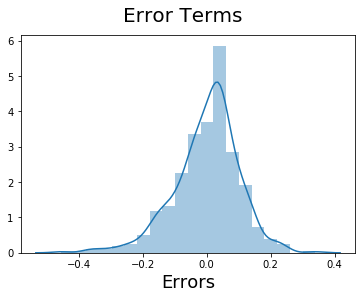

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Looks like the Error Terms are normal distributed

## Making Predictions

#### Applying the scaling on the test set

In [104]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [105]:
y_test = df_test.pop('cnt')
X_test = df_test

In [106]:
# Adding a constant variable 

X_test = sm.add_constant(X_test)

In [107]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]


In [108]:
# Making predictions

y_pred = lm.predict(X_test_new)

### Evaluate r2_score

In [109]:
from sklearn.metrics import r2_score

In [110]:
r2_score(y_true=y_test, y_pred=y_pred)

0.7790382923944472

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

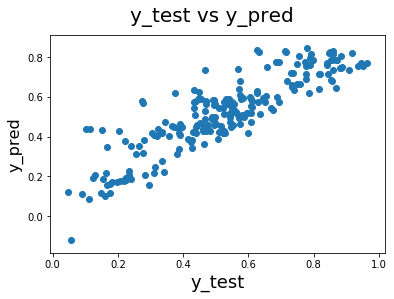

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

count= 0.375xtemp+0.003xSpring+0.057xSep+0.237x2019-0.143xwindspeed-0.144xWinter-0.246xLightRain/LightSnow


Overall we have a good model 
#### R-squared - 79 and Adjusted R-squared - 79
#### r2_score on test dataset - 77